# Задание **Ultra pro**

Напишите SQL код для создания витрины данных из исходных данных в задании Light.

Данную работу можно посмотреть на гугл документах по ссылке:
https://docs.google.com/document/d/1v28A87WwoqdqJA_NXS7z1I1Bdo97AYonluomjuAL7bE/edit?usp=sharing


**Для начала создадим таблицу**

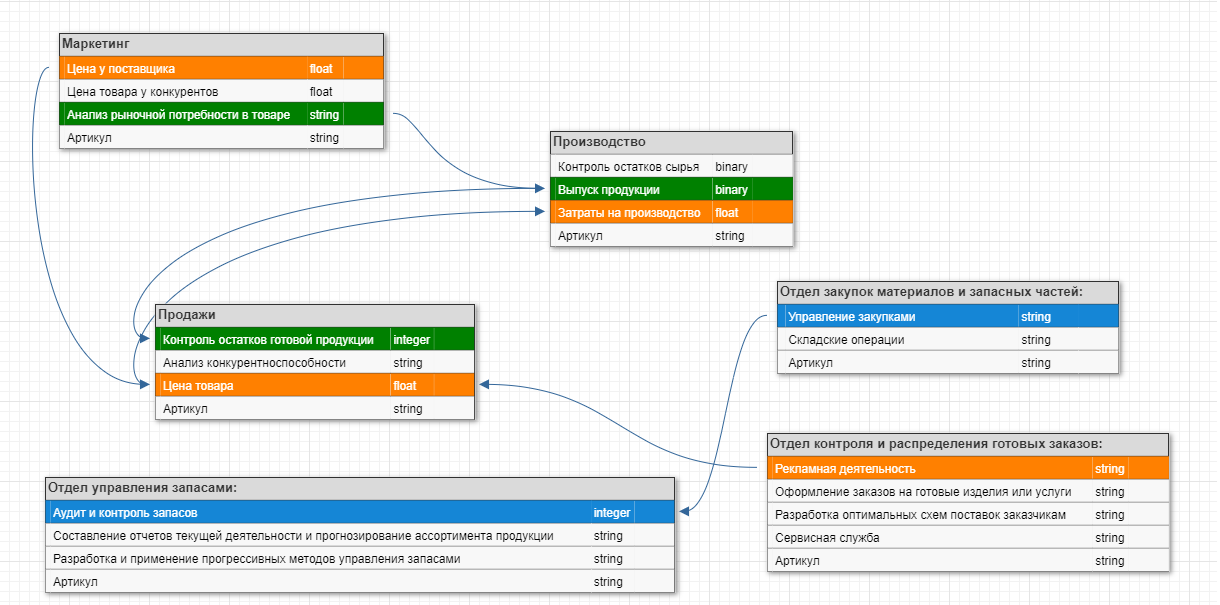

Витрина для **продаж**: цена товара=цена поставщика+свои затраты+сумма для прибыли

*Цель*: рассчитать цену продажи с учетом компенсации затрат и получения прибыли.

Берем поля:
  - из базы маркетинга: цены у поставщика
  - из базы производства: затраты на производство
  - из базы Отдела контроля: рекламную деятельность
  - из базы продажи: цену товара


Витрина для **производства**: сколько  еще надо произвести = необходимое кол-во для продаж - остатки готовой продукции 

*Цель*: исключить возможность перепроизводства во избежании избытка на складе

Берем поля:
  - из базы производство: выпуск продукции 
  - из базы продажи: контроль остатков готовой продукции
  - из базы маркетинг: анализ рыночной потребности товара


Витрина для **закупки**: сколько надо еще произвести = необходимое кол-во для производства - остатки сырья

*Цель*: исключить возможность перезакупки во избежании избытка на складе.

Берем поля:
  - из базы отдела контроля: управление закупками
  - из базы отдела управления запасами: аудит и контроль запасов

# SQL код

CREATE TABLE `Отдел закупок материалов и запасных частей:` (

	`Управление закупками` VARCHAR(255) NOT NULL,
	`Складские операции` VARCHAR(255) NOT NULL
   );

CREATE TABLE `Отдел управления запасами:` (

	`Аудит и контроль запасов` INT NOT NULL,
	`Составление отчетов текущей деятельности и прогнозирование ассортимента продукции` VARCHAR(255) NOT NULL,
	`Разработка и применение прогрессивных методов управления запасами` VARCHAR(255) NOT NULL

);

CREATE TABLE `Маркетинг` (

	`Цена у поставщика` FLOAT NOT NULL,
	`Цена товара у конкурентов` FLOAT NOT NULL,
	`Анализ рыночной потребности в товаре` VARCHAR(255) NOT NULL
);


CREATE TABLE `Продажи` (

	`Контроль остатков готовой продукции` INT NOT NULL,
	`Анализ конкурентноспособности` VARCHAR(255) NOT NULL,
	`Цена товара` FLOAT NOT NULL

);

CREATE TABLE `Отдел контроля и распределения готовых заказов:` (

	`Рекламная деятельность` VARCHAR(255) NOT NULL,
	`Оформление заказов на готовые изделия или услуги` VARCHAR(255) NOT NULL,
	`Разработка оптимальных схем поставок заказчикам` VARCHAR(255) NOT NULL,
	`Сервисная служба` VARCHAR(255) NOT NULL

);

CREATE TABLE `Производство` (

	`Контроль остатков сырья` BINARY NOT NULL,
	`Выпуск продукции` BINARY NOT NULL,
	`Затраты на производство` FLOAT NOT NULL
  
);

ALTER TABLE `Отдел закупок материалов и запасных частей:` ADD CONSTRAINT `Отдел закупок материалов и запасных частей:_fk0` FOREIGN KEY (`Управление закупками`) REFERENCES `Отдел управления запасами:`(`Аудит и контроль запасов`);

ALTER TABLE `Маркетинг` ADD CONSTRAINT `Маркетинг_fk0` FOREIGN KEY (`Цена у поставщика`) REFERENCES `Продажи`(`Цена товара`);

ALTER TABLE `Маркетинг` ADD CONSTRAINT `Маркетинг_fk1` FOREIGN KEY (`Анализ рыночной потребности в товаре`) REFERENCES `Производство`(`Выпуск продукции`);

ALTER TABLE `Продажи` ADD CONSTRAINT `Продажи_fk0` FOREIGN KEY (`Цена товара`) REFERENCES `Производство`(`Затраты на производство`);

ALTER TABLE `Отдел контроля и распределения готовых заказов:` ADD CONSTRAINT `Отдел контроля и распределения готовых заказов:_fk0` FOREIGN KEY (`Рекламная деятельность`) REFERENCES `Продажи`(`Цена товара`);

ALTER TABLE `Производство` ADD CONSTRAINT `Производство_fk0` FOREIGN KEY (`Выпуск продукции`) REFERENCES `Продажи`(`Контроль остатков готовой продукции`);








# После создания этих таблиц мы для каждой витрины делаем свой SQL запрос

1. Витрина **продаж**:

  -Витрина для продаж: цена товара=цена поставщика+свои затраты+сумма для прибыли

  SELECT Продажи.Цена товара - Маркетинг.Цена поставщика - Отдел контроля и распределения готовых заказов.Рекламная деятельность

  FROM Продажи, Маркетинг, Отдел контроля и распределения готовых заказов

  WHERE Продажи.артикул = Поставщик.артикул

 - остатки магазина  и остатки на складе.
 

2. Витрина для **производства**: 
  сколько еще надо произвести = необходимое кол-во для продаж - остатки готовой продукции

  SELECT Производство.Выпуск продукции - Продажи.Контроль остатков готовой продукции - Маркетинг.Анализ рыночной потребности в товаре

  FROM Производство, Продажи, Маркетинг

  WHERE Производство.артикул = Продажи.артикул 


3. Витрина для **закупки**: сколько надо еще произвести = необходимое кол-во для производства - остатки сырья

  SELECT Отдел закупок материалов и запасных частей.Управление закупками - Отдел управления запасами.Аудит и контроль запасов

  FROM Отдел закупок материалов и запасных частей, Отдел управления запасами

  WHERE Отдел закупок материалов и запасных частей.артикул = Отдел управления запасами.артикул